<a href="https://colab.research.google.com/github/RuolinZheng08/cmsc25460-optimization/blob/master/HW3_convex_func.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3 Convex Functions

In [0]:
import numpy as np
import sympy as sp
from sympy.tensor.array import derive_by_array
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Q1

In [0]:
def eval_at(grad_func, hessian_func, variables):
  np.set_printoptions(precision=4)
  print('\nAt point:', variables)
  print(grad_func(*variables))
  hess = hessian_func(*variables)
  print(np.array(hess))
  evalues = np.linalg.eig(hess)[0]
  print(evalues) # eigenvalues
  if np.alltrue(evalues > 0):
    print('positive definite')
  elif np.alltrue(evalues >= 0):
    print('positive semidefinite')
  elif np.alltrue(evalues < 0):
    print('negative definite')
  elif np.alltrue(evalues <= 0):
    print('negative semidefinite')
  else:
    print('indefinite\n')

In [17]:
x1, x2 = sp.symbols('x1 x2')
func = x1**4 + x2**4 - x1*x2**3 - x1**2*x2**2 + x1**3 + x2**3
grad = derive_by_array(func, [x1, x2])
hessian = derive_by_array(grad, [x1, x2])

num_func = sp.lambdify((x1, x2), func)
num_grad = sp.lambdify((x1, x2), grad)
num_hessian = sp.lambdify((x1, x2), hessian)

eval_at(num_grad, num_hessian, (1, 0))
eval_at(num_grad, num_hessian, (1, 1))


At point: (1, 0)
[7, 0]
[[18  0]
 [ 0 -2]]
[18. -2.]
indefinite


At point: (1, 1)
[4, 2]
[[16 -7]
 [-7 10]]
[20.6158  5.3842]
positive definite


## Q2

In [18]:
variables = sp.symbols('x1 x2 x3 x4')
x1, x2, x3, x4 = variables
func = x1**4*x2 - x3/(1+x2)**2 + 100*x1*np.e**x3 + x4**3
grad = derive_by_array(func, variables)
hessian = derive_by_array(grad, variables)

num_func = sp.lambdify(variables, func)
num_grad = sp.lambdify(variables, grad)
num_hessian = sp.lambdify(variables, hessian)

eval_at(num_grad, num_hessian, (1, 1, -5, 0))
eval_at(num_grad, num_hessian, (1, 1, -5, 2))
eval_at(num_grad, num_hessian, (1, 1, 1, 2))


At point: (1, 1, -5, 0)
[4.673794699908541, -0.25, 0.4237946999085408, 0]
[[12.      4.      0.6738  0.    ]
 [ 4.      1.875   0.25    0.    ]
 [ 0.6738  0.25    0.6738  0.    ]
 [ 0.      0.      0.      0.    ]]
[13.43    0.4839  0.6348  0.    ]
positive semidefinite

At point: (1, 1, -5, 2)
[4.673794699908541, -0.25, 0.4237946999085408, 12]
[[12.      4.      0.6738  0.    ]
 [ 4.      1.875   0.25    0.    ]
 [ 0.6738  0.25    0.6738  0.    ]
 [ 0.      0.      0.     12.    ]]
[13.43    0.4839  0.6348 12.    ]
positive definite

At point: (1, 1, 1, 2)
[275.828182845905, 1.25, 271.578182845905, 12]
[[ 1.2000e+01  4.0000e+00  2.7183e+02  0.0000e+00]
 [ 4.0000e+00 -3.7500e-01  2.5000e-01  0.0000e+00]
 [ 2.7183e+02  2.5000e-01  2.7183e+02  0.0000e+00]
 [ 0.0000e+00  0.0000e+00  0.0000e+00  1.2000e+01]]
[ 4.4320e+02 -1.5943e+02 -3.2096e-01  1.2000e+01]
indefinite



## Q3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


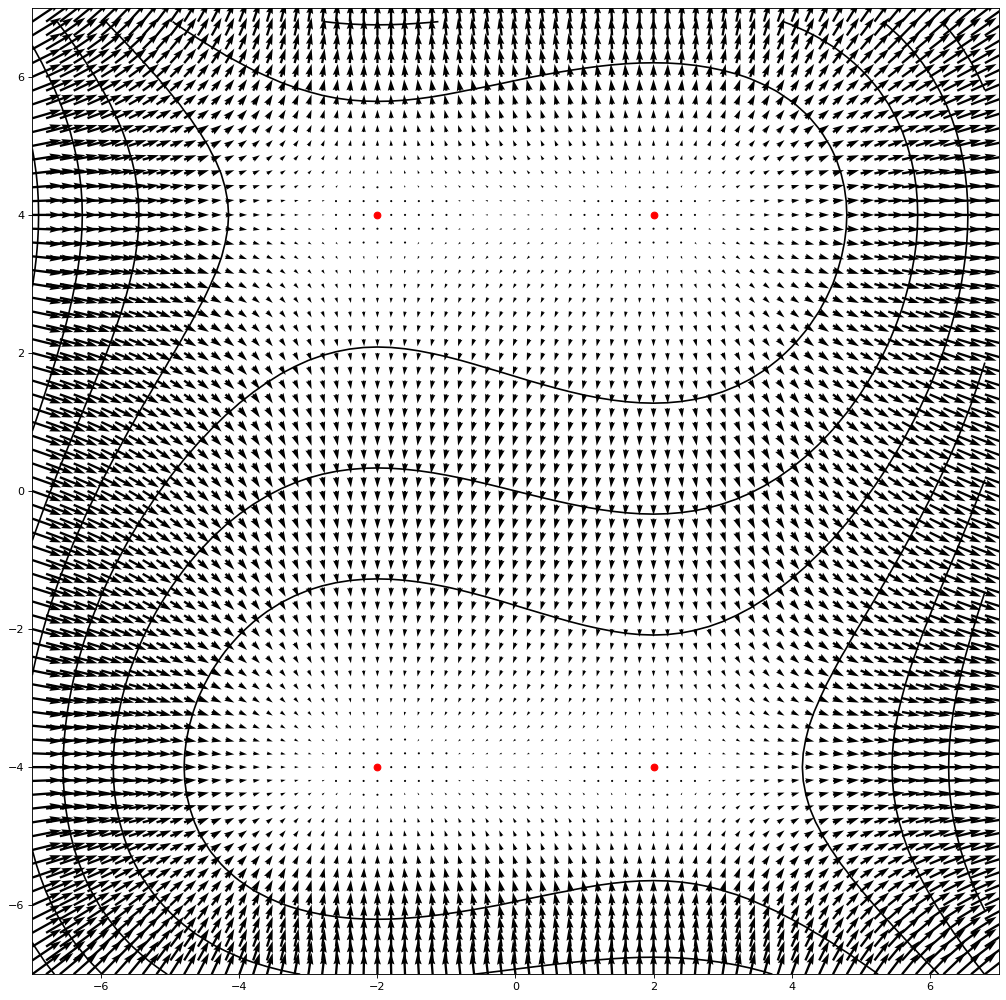

2 4 -48.0
2 -4 37.33333333333333
-2 4 -37.33333333333333
-2 -4 48.0


In [30]:
variables = sp.symbols('x1 x2')
x1, x2 = variables
func = x1**3/3 - 4*x1 + x2**3/3 - 16*x2
grad = derive_by_array(func, variables)
num_func = sp.lambdify(variables, func)
num_grad = sp.lambdify(variables, grad)

X, Y = np.meshgrid(np.arange(-7, 7, 0.2), np.arange(-7, 7, 0.2))
F = num_func(X, Y) 
U, V = num_grad(X, Y)
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.contour(X, Y, F, 10, colors = 'k', linestyles = 'solid')        # Generates the contour plot for f
plt.axes().set_aspect('equal')                                      # Scale the plot size to get same aspect ratio
plt.axis([-7, 7, -7, 7])
plt.quiver(X, Y, U, V, edgecolor='k', scale = 1500)                 # Plots the vecotr field U,V over the grid (X,Y)
# highlight the points
xs = [2, 2, -2, -2]
ys = [4, -4, 4, -4]
plt.plot(xs, ys, 'ro')
plt.show()

for x, y in zip(xs, ys):
  print(x, y, num_func(x, y))